In [294]:
import pandas as pd
import os
import sys
import datetime

In [154]:
FILE = 'access.log'

In [155]:
with open(FILE) as f:
    contents = f.read()

In [159]:
lines = contents.split('\n')

In [119]:
line = lines[0]

In [120]:
line.split(' ')

['97.105.19.58',
 '-',
 '-',
 '[16/Apr/2019:19:34:42',
 '+0000]',
 '"GET',
 '/api/v1/sales?page=81',
 'HTTP/1.1"',
 '200',
 '512495',
 '"-"',
 '"python-requests/2.21.0"']

In [ ]:
lines = lines[:-1]

In [249]:
def process_line(line: str):
    parts = line.split(' ')

    ip = parts[0]

    timestamp = parts[3] #+ parts[4]
    timestamp = timestamp.replace('[', '')
#     timestamp = timestamp.replace(']', '')

    request_method = parts[5]
    request_method = request_method.replace('"', '')

    path = parts[6]
    protocol_version = parts[7]
    protocol_version = protocol_version.replace('"', '')
    status_code = parts[8]
    size = parts[9]
    unknown = parts[10]
    unknown = unknown.replace('"', '')
    user_agent = parts[11:]
    user_agent = ' '.join(user_agent)
    user_agent = user_agent.replace('"', '')

    return dict(ip=ip, timestamp=timestamp,
                method=request_method,
                path=path,
                protocol=protocol_version,
                code=status_code,
                size=size,
                unknown=unknown,
                user_agent=user_agent)

In [250]:
df = pd.DataFrame([process_line(line) for line in lines])

In [233]:
processed_lines = []
for line in lines:
    processed_lines.append(process_line(line))

In [234]:
df = pd.DataFrame(processed_lines)

In [251]:
df.head()

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
0,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,16/Apr/2019:19:34:42,-,python-requests/2.21.0
1,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,16/Apr/2019:19:34:42,-,python-requests/2.21.0
2,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,16/Apr/2019:19:34:44,-,python-requests/2.21.0
3,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,16/Apr/2019:19:34:46,-,python-requests/2.21.0
4,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,16/Apr/2019:19:34:48,-,python-requests/2.21.0


In [252]:
df['timestamp'] = df.timestamp.str.replace(':', ' ', 1)

In [253]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [254]:
df.head()

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
0,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,2019-04-16 19:34:42,-,python-requests/2.21.0
1,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,2019-04-16 19:34:42,-,python-requests/2.21.0
2,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,2019-04-16 19:34:44,-,python-requests/2.21.0
3,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,2019-04-16 19:34:46,-,python-requests/2.21.0
4,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,2019-04-16 19:34:48,-,python-requests/2.21.0


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13974 entries, 0 to 13973
Data columns (total 9 columns):
code          13974 non-null object
ip            13974 non-null object
method        13974 non-null object
path          13974 non-null object
protocol      13974 non-null object
size          13974 non-null object
timestamp     13974 non-null datetime64[ns]
unknown       13974 non-null object
user_agent    13974 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 982.6+ KB


In [242]:
for col in df:
    print(df[col].value_counts())

200    13958
499       16
Name: code, dtype: int64
97.105.19.58      11998
173.173.113.51     1059
72.181.113.170      613
72.181.105.81       246
68.201.219.223       21
24.26.242.9          21
52.87.230.102         2
35.175.171.137        2
70.121.214.34         2
54.172.14.223         1
45.23.250.16          1
34.207.64.242         1
52.90.165.200         1
34.229.70.250         1
35.174.209.2          1
3.88.129.158          1
54.145.52.184         1
52.91.30.150          1
3.92.201.136          1
Name: ip, dtype: int64
GET    13974
Name: method, dtype: int64
/api/v1/sales?page=2                       709
/api/v1/items                              464
/api/v1/items?page=2                       291
/api/v1/items?page=3                       219
/api/v1/stores                             162
/api/v1/sales                              152
/                                          107
/documentation                             100
/api/v1/sales?page=3                        91
/api/v1

In [245]:
df.head(176)

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
0,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,2019-04-16 19:34:42,-,python-requests/2.21.0
1,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,2019-04-16 19:34:42,-,python-requests/2.21.0
2,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,2019-04-16 19:34:44,-,python-requests/2.21.0
3,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,2019-04-16 19:34:46,-,python-requests/2.21.0
4,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,2019-04-16 19:34:48,-,python-requests/2.21.0
5,200,97.105.19.58,GET,/api/v1/stores,HTTP/1.1,1328,2019-04-16 19:34:48,-,python-requests/2.21.0
6,200,97.105.19.58,GET,/api/v1/sales?page=85,HTTP/1.1,510753,2019-04-16 19:34:50,-,python-requests/2.21.0
7,200,97.105.19.58,GET,/api/v1/sales?page=86,HTTP/1.1,510348,2019-04-16 19:34:52,-,python-requests/2.21.0
8,200,97.105.19.58,GET,/,HTTP/1.1,42,2019-04-16 19:34:52,-,python-requests/2.21.0
9,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,2019-04-16 19:34:53,-,python-requests/2.21.0


In [246]:
df.unknown.value_counts()

-                                                               13949
https://python.zach.lol/                                            4
https://ds.codeup.com/8.3_Acquire/                                  3
https://python.zach.lol/api/v1/                                     2
https://python.zach.lol/api/v1/stores?page=1                        2
https://python.zach.lol/api/v1/items?page=0                         1
https://python.zach.lol/api/v1//api/v1/items?page=2                 1
http://localhost:8889/notebooks/timeseries_acquisition.ipynb        1
https://python.zach.lol/api/v1//api/v1/items                        1
https://python.zach.lol/api/v1/stores?page=999                      1
https://python.zach.lol/api/v1/items                                1
https://python.zach.lol/api/v1/sales?page=3                         1
http://localhost:8888/notebooks/acquire.ipynb                       1
https://python.zach.lol/api/v1/stores?page=2                        1
https://python.zach.

In [247]:
df.drop(columns=('unknown'), inplace=True)

In [257]:
df.head()

,code,ip,method,path,protocol,size,timestamp,unknown,user_agent
0,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,2019-04-16 19:34:42,-,python-requests/2.21.0
1,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,2019-04-16 19:34:42,-,python-requests/2.21.0
2,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,2019-04-16 19:34:44,-,python-requests/2.21.0
3,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,2019-04-16 19:34:46,-,python-requests/2.21.0
4,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,2019-04-16 19:34:48,-,python-requests/2.21.0


In [258]:
df.set_index('timestamp', inplace=True)

In [259]:
df.head()

,code,ip,method,path,protocol,size,unknown,user_agent
timestamp,,,,,,,,
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,-,python-requests/2.21.0
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,-,python-requests/2.21.0
2019-04-16 19:34:44,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,-,python-requests/2.21.0
2019-04-16 19:34:46,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,-,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,-,python-requests/2.21.0


In [262]:
df['2019-04-16 19':'2019-04-16 21']

,code,ip,method,path,protocol,size,unknown,user_agent
timestamp,,,,,,,,
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,-,python-requests/2.21.0
2019-04-16 19:34:42,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,-,python-requests/2.21.0
2019-04-16 19:34:44,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,-,python-requests/2.21.0
2019-04-16 19:34:46,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,-,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,-,python-requests/2.21.0
2019-04-16 19:34:48,200,97.105.19.58,GET,/api/v1/stores,HTTP/1.1,1328,-,python-requests/2.21.0
2019-04-16 19:34:50,200,97.105.19.58,GET,/api/v1/sales?page=85,HTTP/1.1,510753,-,python-requests/2.21.0
2019-04-16 19:34:52,200,97.105.19.58,GET,/api/v1/sales?page=86,HTTP/1.1,510348,-,python-requests/2.21.0
2019-04-16 19:34:52,200,97.105.19.58,GET,/,HTTP/1.1,42,-,python-requests/2.21.0


In [274]:
df.path.resample('H').count()

timestamp
2019-04-16 14:00:00-05:00    2244
2019-04-16 15:00:00-05:00    4587
2019-04-16 16:00:00-05:00    3430
2019-04-16 17:00:00-05:00    1684
2019-04-16 18:00:00-05:00       2
2019-04-16 19:00:00-05:00       8
2019-04-16 20:00:00-05:00     380
2019-04-16 21:00:00-05:00     284
2019-04-16 22:00:00-05:00     807
2019-04-16 23:00:00-05:00     209
2019-04-17 00:00:00-05:00     253
2019-04-17 01:00:00-05:00      15
2019-04-17 02:00:00-05:00       0
2019-04-17 03:00:00-05:00       0
2019-04-17 04:00:00-05:00       0
2019-04-17 05:00:00-05:00       1
2019-04-17 06:00:00-05:00       0
2019-04-17 07:00:00-05:00      70
Freq: H, Name: path, dtype: int64

In [266]:
df = df.tz_localize('utc').tz_convert('America/Chicago')

In [275]:
df.head()

,code,ip,method,path,protocol,size,unknown,user_agent
timestamp,,,,,,,,
2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,-,python-requests/2.21.0
2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,-,python-requests/2.21.0
2019-04-16 14:34:44-05:00,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,-,python-requests/2.21.0
2019-04-16 14:34:46-05:00,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,-,python-requests/2.21.0
2019-04-16 14:34:48-05:00,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,-,python-requests/2.21.0


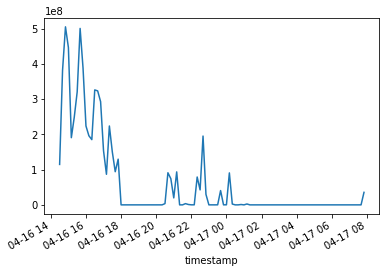

In [272]:
import matplotlib.pyplot as plt
df['size'].astype('int').resample('10min').sum().plot()

In [280]:
df.reset_index(inplace=True)

In [307]:
df.head()


,timestamp,code,ip,method,path,protocol,size,unknown,user_agent,year,quarter,month,day,day_of_week,weekday_or_weekend
0,2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/sales?page=81,HTTP/1.1,512495,-,python-requests/2.21.0,2019,2,4,16,Tuesday,1.0
1,2019-04-16 14:34:42-05:00,200,97.105.19.58,GET,/api/v1/items,HTTP/1.1,3561,-,python-requests/2.21.0,2019,2,4,16,Tuesday,1.0
2,2019-04-16 14:34:44-05:00,200,97.105.19.58,GET,/api/v1/sales?page=82,HTTP/1.1,510103,-,python-requests/2.21.0,2019,2,4,16,Tuesday,1.0
3,2019-04-16 14:34:46-05:00,200,97.105.19.58,GET,/api/v1/sales?page=83,HTTP/1.1,510003,-,python-requests/2.21.0,2019,2,4,16,Tuesday,1.0
4,2019-04-16 14:34:48-05:00,200,97.105.19.58,GET,/api/v1/sales?page=84,HTTP/1.1,511963,-,python-requests/2.21.0,2019,2,4,16,Tuesday,1.0


In [302]:
df['year'] = df.timestamp.dt.year
df['quarter'] = df.timestamp.dt.quarter
df['month'] = df.timestamp.dt.month
df['day'] = df.timestamp.dt.day
df['day_of_week'] = df.timestamp.dt.day_name()
df['weekday_or_weekend'] = ((pd.DatetimeIndex(df.timestamp).dayofweek) < 5).astype(float)

In [298]:
s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
s.dt.day_name()

2016-12-31     Saturday
2017-01-01       Sunday
2017-01-02       Monday
2017-01-03      Tuesday
2017-01-04    Wednesday
2017-01-05     Thursday
2017-01-06       Friday
2017-01-07     Saturday
2017-01-08       Sunday
Freq: D, dtype: object

In [297]:
idx = pd.date_range(start='2018-01-01', freq='D', periods=3)
# idx
# DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03'],
#               dtype='datetime64[ns]', freq='D')
idx.day_name()

Index(['Monday', 'Tuesday', 'Wednesday'], dtype='object')